Downloading the data set 

In [1]:
#Conncting with google drive
from google.colab import drive
drive.mount('/content/GDrive/')

Mounted at /content/GDrive/


In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import os
import random
from keras.preprocessing.image import load_img
from PIL import Image
warnings.filterwarnings('ignore')



Creating Dataframe for input and output

In [3]:

input_path = [] #list contains items directories of images
label = [] #list contains labels.

#looping through the directoty path of the images.
for class_name in os.listdir("/content/GDrive/MyDrive/Image_Recognition_Data/train"):
    for path in os.listdir("/content/GDrive/MyDrive/Image_Recognition_Data/train/"+class_name):
        #if label=0 means cat.
        if class_name == 'cats':
            label.append(0) 
        else:
            label.append(1)
        input_path.append(os.path.join("/content/GDrive/MyDrive/Image_Recognition_Data/train", class_name, path))
print(input_path[0], label[0])

/content/GDrive/MyDrive/Image_Recognition_Data/train/cats/cat.9295.jpg 0


In [4]:
len(label)

23010

In [5]:
#total number of Images.
len(input_path)

23010

In [6]:
 df = pd.DataFrame()
 df ['images'] = input_path
 df ['label'] = label
 df = df.sample(frac=1).reset_index(drop= True)
 df.head()

images  label
0  /content/GDrive/MyDrive/Image_Recognition_Data...      0
1  /content/GDrive/MyDrive/Image_Recognition_Data...      1
2  /content/GDrive/MyDrive/Image_Recognition_Data...      1
3  /content/GDrive/MyDrive/Image_Recognition_Data...      0
4  /content/GDrive/MyDrive/Image_Recognition_Data...      0

In [7]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

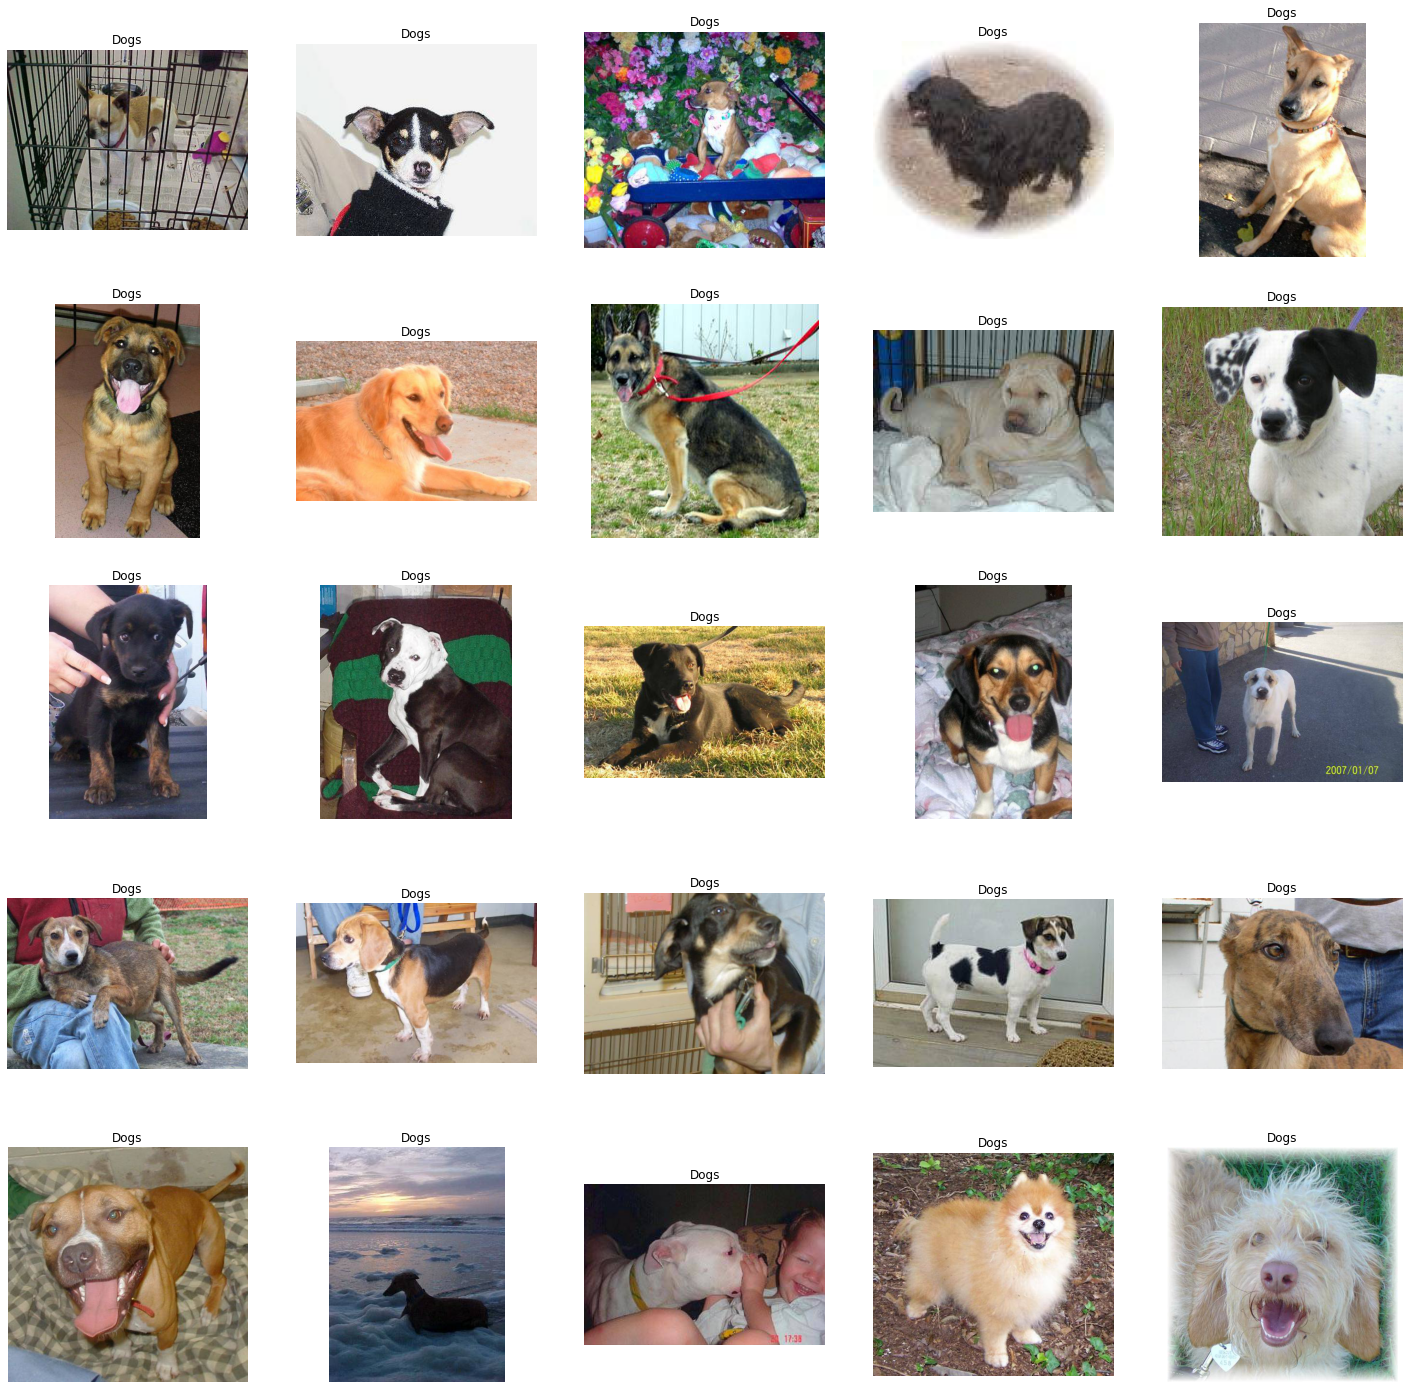

In [8]:
#ploting images of dogs.
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

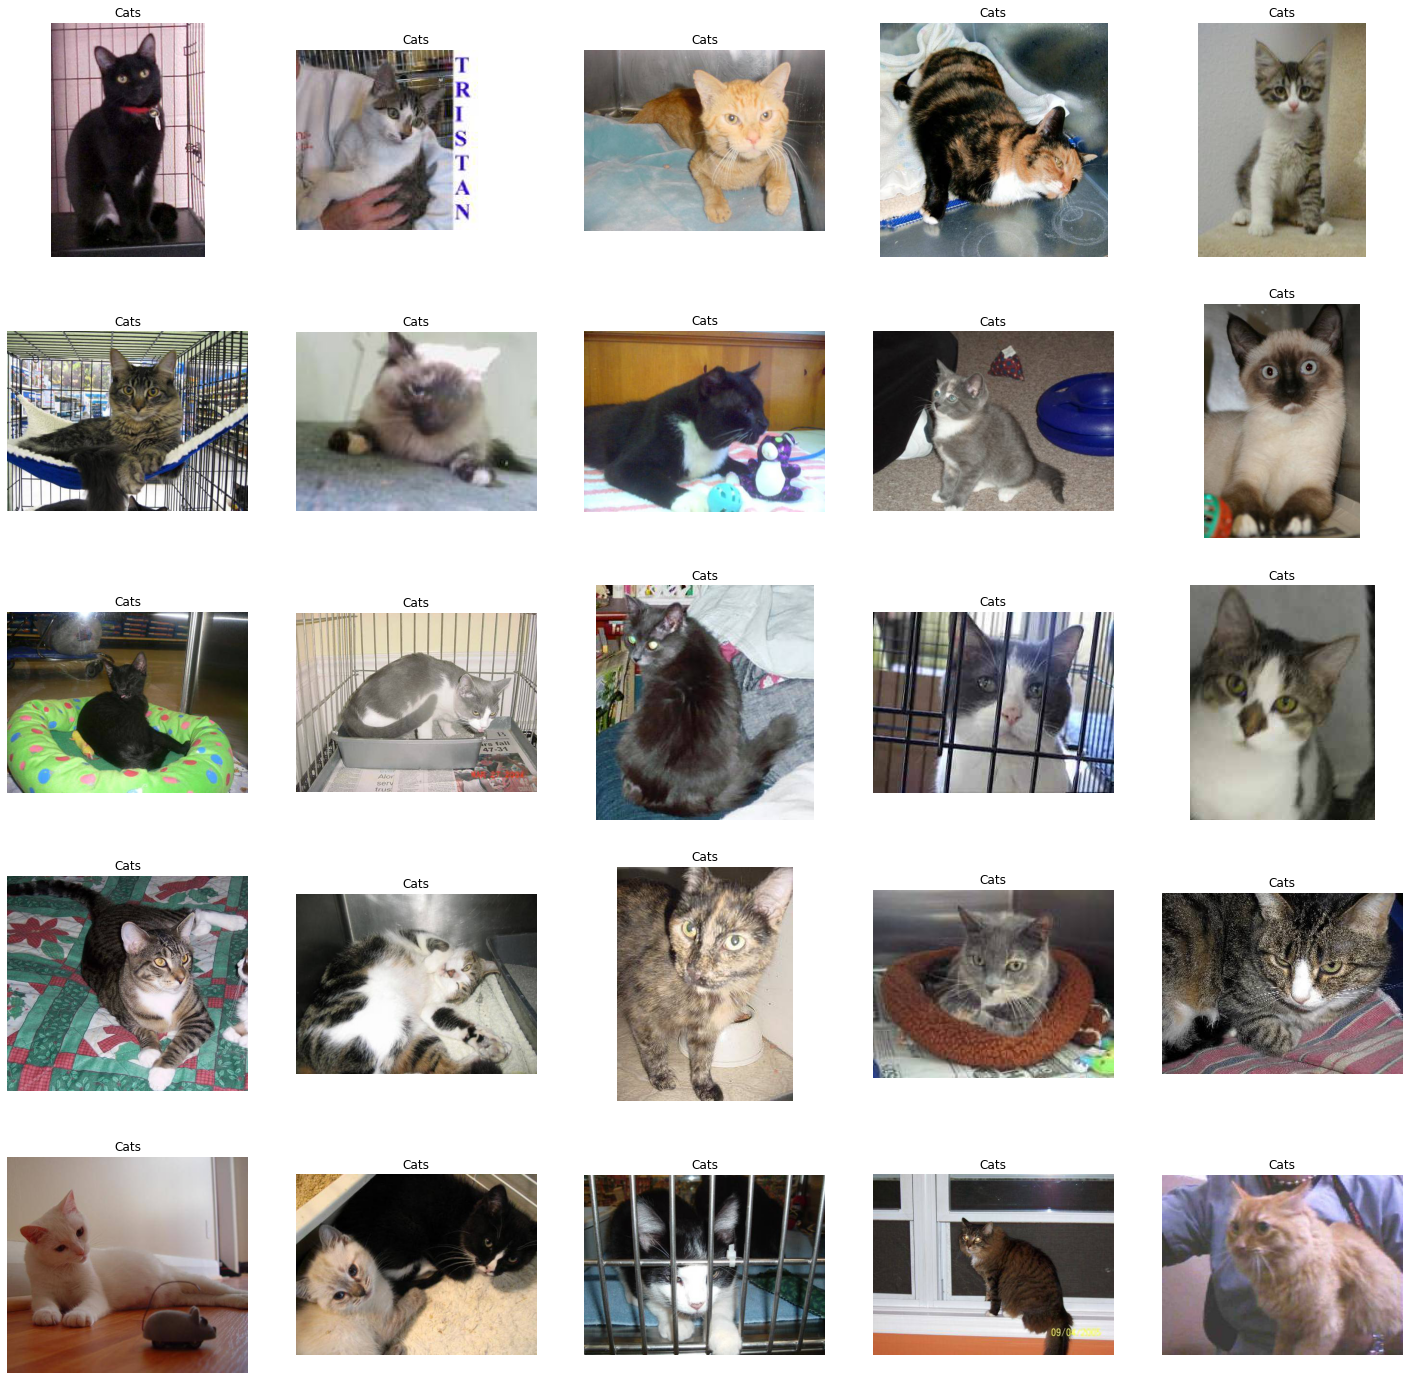

In [9]:
# Displaying images of cats
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

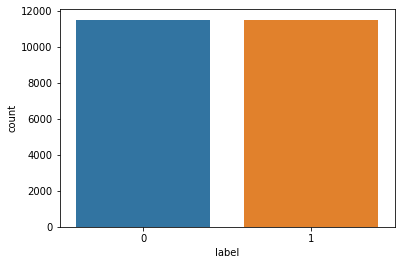

In [10]:
import seaborn as sns
sns.countplot(df['label'])

Create Data Generator for the Images.

In [11]:
df['label'] = df['label'].astype('str')

In [12]:
df.head()

images label
0  /content/GDrive/MyDrive/Image_Recognition_Data...     0
1  /content/GDrive/MyDrive/Image_Recognition_Data...     1
2  /content/GDrive/MyDrive/Image_Recognition_Data...     1
3  /content/GDrive/MyDrive/Image_Recognition_Data...     0
4  /content/GDrive/MyDrive/Image_Recognition_Data...     0

In [13]:
#spliting the test size data 20%.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train.head()

images label
15350  /content/GDrive/MyDrive/Image_Recognition_Data...     0
20181  /content/GDrive/MyDrive/Image_Recognition_Data...     1
41     /content/GDrive/MyDrive/Image_Recognition_Data...     0
20770  /content/GDrive/MyDrive/Image_Recognition_Data...     0
18471  /content/GDrive/MyDrive/Image_Recognition_Data...     0

In [15]:
test.head()

images label
6440   /content/GDrive/MyDrive/Image_Recognition_Data...     0
18725  /content/GDrive/MyDrive/Image_Recognition_Data...     1
2171   /content/GDrive/MyDrive/Image_Recognition_Data...     0
21617  /content/GDrive/MyDrive/Image_Recognition_Data...     0
7703   /content/GDrive/MyDrive/Image_Recognition_Data...     1

In [16]:

#Modifying image matrix.
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    
    #normalization of images
    rescale = 1./233,  
    #augmention of images to avoid overfitting
    rotation_range = 40, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    #matrix size of each image
    target_size=(128,128), 
    #number of test elements that are chosen per epoch 
    batch_size=512, 
    class_mode='binary'
)

#normalization of images
val_generator = ImageDataGenerator(rescale = 1./233)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    #matrix size of each image
    target_size=(128,128), 
    #number of test elements that are chosen per epoch 
    batch_size=512, 
    #Two categories of data
    class_mode='binary'
)

Found 18408 validated image filenames belonging to 2 classes.
Found 4602 validated image filenames belonging to 2 classes.


In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),#filer quantity, filter size, 
                                                                                  #activation function, 
                                                                                  #matrix size of eacg input image
                    
                    MaxPool2D((2,2)), #max pulling matrix size
                    Conv2D(32, (3,3), activation='relu'), #filer quantity, filter size, activation function, 
                                                                                  
                    MaxPool2D((2,2)), #max pulling matrix size
                    Conv2D(64, (3,3), activation='relu'), #filer quantity, filter size, activation function,
                    MaxPool2D((2,2)), #max pulling matrix size
                    Flatten(),
                    Dense(512, activation='relu'), #dense layer has 512 neurons and relu activation function
                    Dense(1, activation='sigmoid') #output layer has one neuron. 
])

In [18]:
# adam optimizer updates the weight during the backpropagation and decreases the value of loss. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [20]:
#Training the model.
#1 epoch means passing through all the dataset one time during the training. 
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
36/36 [==============================] - 597s 17s/step - loss: 0.6517 - accuracy: 0.6227 - val_loss: 0.6102 - val_accuracy: 0.6656
Epoch 2/10
36/36 [==============================] - 138s 4s/step - loss: 0.5987 - accuracy: 0.6825 - val_loss: 0.5877 - val_accuracy: 0.6893
Epoch 3/10
36/36 [==============================] - 137s 4s/step - loss: 0.5649 - accuracy: 0.7081 - val_loss: 0.5446 - val_accuracy: 0.7269
Epoch 4/10
36/36 [==============================] - 135s 4s/step - loss: 0.5452 - accuracy: 0.7249 - val_loss: 0.5354 - val_accuracy: 0.7364
Epoch 5/10
36/36 [==============================] - 136s 4s/step - loss: 0.5188 - accuracy: 0.7429 - val_loss: 0.5393 - val_accuracy: 0.7292
Epoch 6/10
36/36 [==============================] - 135s 4s/step - loss: 0.4947 - accuracy: 0.7586 - val_loss: 0.4710 - val_accuracy: 0.7781
Epoch 7/10
36/36 [==============================] - 144s 4s/step - loss: 0.4819 - accuracy: 0.7682 - val_loss: 0.4665 - val_accuracy: 0.7831
Epoch 8/10
3

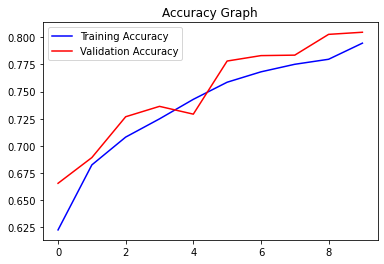

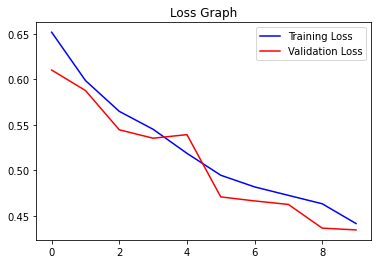

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

#ploing the data of Training and Validation accuracy. 
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()